<a href="https://colab.research.google.com/github/sdshaheer/TensorFlow/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets

In [ ]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
dictonary={0:"Aeroplane",1:"Automobile",2:"Bird",3:"Cat",4:"Deer",5:"Dog",6:"Frog",7:"Horse",8:"Ship",9:"Truck"}
x_train.shape


170508288/170498071 [==============================] - 11s 0us/step


(50000, 32, 32, 3)

In [ ]:
def plot_image(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(dictonary[y[index]])


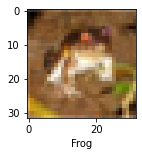

In [ ]:
y_train=y_train.reshape(-1,)
plot_image(x_train,y_train,0)

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
model=tf.keras.Sequential([
      tf.keras.layers.Conv2D(32,3,activation="relu",input_shape=(32,32,3)),
      tf.keras.layers.MaxPooling2D((2,2)),

      tf.keras.layers.Conv2D(64,3,activation="relu"),
      tf.keras.layers.MaxPooling2D((2,2)),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(64,activation="relu"),
      tf.keras.layers.Dense(10,activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.4846 - accuracy: 0.4640
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1305 - accuracy: 0.6006
Epoch 3/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.9942 - accuracy: 0.6537
Epoch 4/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.9058 - accuracy: 0.6862
Epoch 5/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8405 - accuracy: 0.7095
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7861 - accuracy: 0.7297
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7399 - accuracy: 0.7438
Epoch 8/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6931 - accuracy: 0.7594
Epoch 9/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6536 - accuracy: 0.7737
Epoch 10/10
1563/1563 [==============================] - 61s 39m

In [ ]:
model.evaluate(x_test,y_test)


313/313 [==============================] - 4s 12ms/step - loss: 0.9336 - accuracy: 0.6860


[0.9336471557617188, 0.6859999895095825]

In [ ]:
model.save('model2')

INFO:tensorflow:Assets written to: model2/assets


In [ ]:
model.save('my_model')

INFO:tensorflow:Assets written to: my_model/assets


In [ ]:
y_test=y_test.reshape(-1,)
ypred=model.predict([x_test])


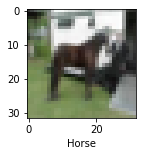

In [ ]:
plot_image(x_test,y_test,20)

In [ ]:
y_pred=model.predict(x_test)


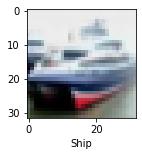

In [ ]:

plot_image(x_test,y_test,1)

In [ ]:
np.argmax(y_pred[1])

8